<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification/blob/main/Model_Evaluation_Smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data from GitHub and installing package


The project is hosted on GitHub. Get a copy by running:

In [2]:
!git clone https://github.com/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification.git

Cloning into 'Dusty-Stellar-Sources-Classification'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 136 (delta 7), reused 0 (delta 0), pack-reused 114
Receiving objects: 100% (136/136), 17.90 MiB | 32.10 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [3]:
!pip install pyunpack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 4.5 MB/s eta 0:00:00


# Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io, requests, zipfile
from zipfile import ZipFile
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score , precision_score , f1_score , classification_report
from pyunpack import Archive
import warnings
warnings.filterwarnings('ignore')

In [6]:
#https://blog.finxter.com/how-to-plot-sklearn-confusion-matrix-with-labels/
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title = 'Confusion matrix',
                          cmap=None,
                          normalize=True,
                          size = [16,12],
                          file_name = False,
                          color_bar = True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    color_bar:    if Ture, plot the color bar on the right hand side
                  if false, Do not plot that

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if cmap is None:
        cmap = plt.get_cmap('Greens')

    plt.figure(figsize=(size[0],size[1]))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.ylabel('True label' , fontsize = 16 )
    plt.xlabel('Predicted label', fontsize = 16 )

    if title is not None:
      plt.title(title ,fontsize = 16 )
    
    if color_bar == True : 
      plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)




    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            #if cm[i,j]>= 0.01 : # if you want remove 0.1>
                plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    if file_name != False : 
        plt.savefig(file_name , dpi=300)
    plt.show()

# Data Pre

In [7]:
df = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Preprocessed_Data.csv")

In [8]:
df

,RAdeg,DEdeg,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],SpClass,GeneralClass
0,69.338100,-70.579000,NaN,-0.213,-2.052,-4.577,NaN,NaN,NaN,-7.6101,-7.7148,-7.8326,-8.0159,-8.8792,OAGB,DSS
1,71.613100,-68.796300,1.632,2.226,0.531,-2.137,-5.04,-6.57,-7.84,-8.6656,-9.3873,-9.8100,-10.2429,-11.1944,CAGB,DSS
2,71.827700,-69.705700,-0.727,-2.876,-4.804,-7.220,-8.42,NaN,NaN,-9.6540,-9.4759,-9.6545,-9.7627,-10.9685,RSG,DSS
3,72.157300,-69.393600,NaN,3.450,2.467,1.136,-1.32,-3.37,-5.31,-8.1534,-9.0379,-9.8431,-10.6543,-13.6554,YSO,DSS
4,72.393200,-69.097000,-5.087,-4.936,-5.254,-5.992,-6.39,-6.86,-7.42,-8.4329,-8.9152,-9.2952,-9.9431,-11.3106,OAGB,DSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,15.093451,-72.166074,-0.232,0.796,0.248,-0.445,NaN,-2.54,-4.04,-6.3120,-7.3400,-8.2350,-9.4640,-13.6900,YSO,DSS
604,14.527078,-72.068717,-0.459,-0.388,-0.926,-1.672,-2.36,-2.83,-3.27,-5.5270,-5.6600,-8.0320,-9.6220,-15.6450,YSO,DSS
605,14.488457,-72.654396,-1.433,-0.683,-1.165,-1.937,-2.42,-3.14,-4.14,-6.6860,-7.2730,-8.2610,-9.2260,-15.2890,YSO,DSS
606,14.027887,-72.789808,-1.445,-1.084,-1.477,-2.014,-2.74,-3.09,-3.23,-5.4810,-5.9750,-7.7430,-9.1680,-15.3400,YSO,DSS


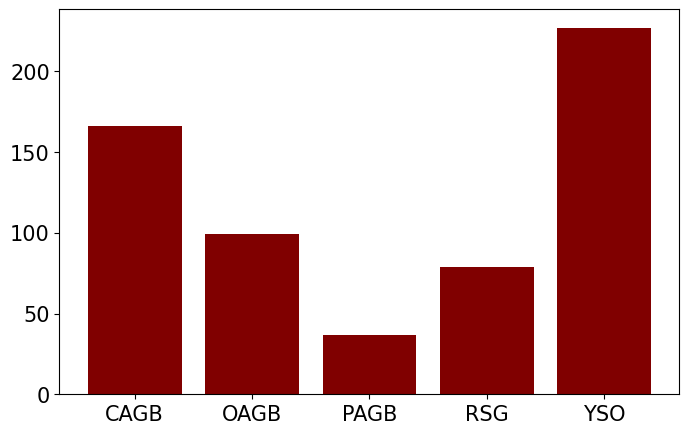

In [9]:
n = df.pivot_table(index=['SpClass'], aggfunc='size').index
s = list(df.pivot_table(index=['SpClass'], aggfunc='size'))

fig=plt.figure(figsize=(8,5))
line = plt.bar(n  , s  , color = 'maroon' , log  = False )

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.show()
fig.savefig('SPclass_hist.pdf',dpi=400)

In [10]:
from sklearn import preprocessing

LE = preprocessing.LabelEncoder()
Y = LE.fit_transform(df['SpClass'])
Y = pd.DataFrame(Y)
Y.columns = ['EY']

print('Ordinal Encoding:')
LE.inverse_transform(np.arange(0,5))

Ordinal Encoding:


array(['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'], dtype=object)

Here we use an algorithm named IterativeImputer to fill the blank (NaN) data points.

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

For more information : https://scikit-learn.org/stable/modules/impute.html#iterative-imputer

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer( random_state= 0 )
df[df.columns[2:-2]] = imp.fit_transform(df[df.columns[2:-2]])

In [12]:
X = df[df.columns[2:-2]]
Y = Y['EY']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size= 0.10 , random_state = 1234 )
print('X_train : ' , X_train.shape)
print('X_test : ' , X_test.shape)
print('Y_train : ' , Y_train.shape)
print('Y_test : ' , Y_test.shape)

X_train :  (547, 12)
X_test :  (61, 12)
Y_train :  (547,)
Y_test :  (61,)


# Loading Smote data

In [14]:
AX_train = pd.read_csv("/content/drive/MyDrive/IPM/Dusty Stellar Sources Classification/Data/Smote_train_data.csv", index_col = 'Unnamed: 0' )

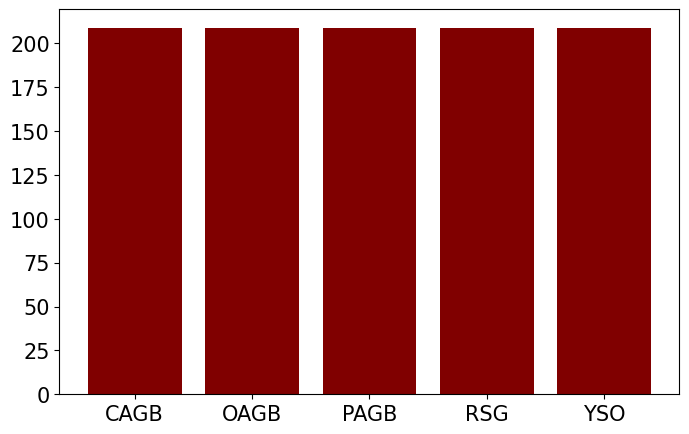

In [15]:
n = AX_train.pivot_table(index=['SpClass'], aggfunc='size').index
s = list(AX_train.pivot_table(index=['SpClass'], aggfunc='size'))

fig=plt.figure(figsize=(8,5))
line = plt.bar(n  , s  , color = 'maroon' , log  = False )

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.show()
fig.savefig('SPclass_hist_smote.pdf',dpi=400)

In [16]:
AY_train = AX_train[AX_train.columns[-1]]
AX_train = AX_train[AX_train.columns[:-1]]

In [17]:
AX_train

,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24]
0,-2.375000,-0.735000,-1.955000,-2.603000,-3.140000,-3.980000,-5.220000,-7.600000,-8.417000,-9.339000,-10.337000,-13.622000
1,-3.256000,-2.689000,-3.623000,-2.228000,-2.990000,-3.200000,-4.200000,-5.905100,-6.716200,-7.841400,-9.681100,-14.282700
2,-0.109000,0.546000,-0.162000,-1.186000,-1.470000,-2.750000,-4.390000,-7.244500,-8.581700,-9.976000,-11.876200,-16.659800
3,-0.472000,-2.237000,-4.187000,-6.622000,-8.310000,-9.253748,-9.376921,-9.883000,-9.750000,-9.949000,-10.044000,-10.397000
4,-0.761000,0.169000,-0.679000,-1.790000,-2.440000,-3.070000,-3.900000,-5.750000,-6.486000,-7.366000,-8.985000,-13.175000
...,...,...,...,...,...,...,...,...,...,...,...,...
1040,-4.675793,-4.685953,-5.903189,-6.098380,-5.915428,-7.026273,-8.293829,-10.274385,-10.132177,-10.341258,-10.445141,-10.856064
1041,-1.552889,-3.009565,-5.207486,-7.715463,-7.289028,-8.360302,-9.162890,-11.417308,-11.599169,-11.873884,-11.971084,-14.782237
1042,-5.944225,-5.983180,-7.098453,-8.100092,-7.585120,-8.187533,-9.058442,-10.938323,-10.925672,-11.248453,-11.794586,-13.732404
1043,-0.683875,-2.765144,-4.746852,-7.174758,-8.486143,-9.313250,-9.257680,-9.756098,-9.599138,-9.817661,-10.018620,-11.366178


In [18]:
AY_train = LE.transform(AY_train)

In [19]:
AY_train

array([4, 2, 4, ..., 3, 3, 3])

In the next cell, we use the Min Max scaler to scale data between 0 and 1. This algorithm helps models in training.

In [20]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
MMS.fit(AX_train)
AX_train = MMS.transform(AX_train)
X_test = MMS.transform(X_test)

In [21]:
X_train = AX_train
Y_train = AY_train 
print('X_train : ' , X_train.shape)
print('X_test : ' , X_test.shape)
print('Y_train : ' , Y_train.shape)
print('Y_test : ' , Y_test.shape)

X_train :  (1045, 12)
X_test :  (61, 12)
Y_train :  (1045,)
Y_test :  (61,)


# PRF

In [ ]:
!git clone https://github.com/ireis/PRF.git

Cloning into 'PRF'...
remote: Enumerating objects: 223, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 223 (delta 3), reused 6 (delta 2), pack-reused 211
Receiving objects: 100% (223/223), 15.34 MiB | 16.06 MiB/s, done.
Resolving deltas: 100% (113/113), done.


In [ ]:
from PRF import PRF

In [ ]:
prf_cls = PRF.prf(n_estimators=10, bootstrap=True, keep_proba=0.01)
prf_cls.fit( X=X_train, y=np.array(Y_train))
Y_pred = prf_cls.predict(X_test)
print('PRF: {}'.format(prf_cls.score(X=X_test, y=np.array(Y_test))))

PRF: 0.9016393442622951


              precision    recall  f1-score   support

           0       1.00      0.81      0.89        21
           1       0.87      1.00      0.93        13
           2       0.67      0.67      0.67         3
           3       0.86      1.00      0.92         6
           4       0.89      0.94      0.92        18

    accuracy                           0.90        61
   macro avg       0.86      0.88      0.87        61
weighted avg       0.91      0.90      0.90        61



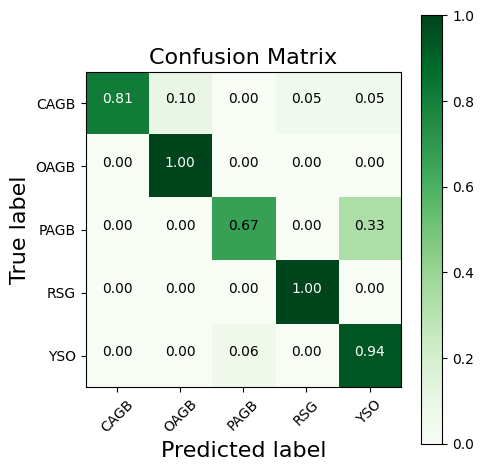

In [ ]:
print(classification_report( Y_test , Y_pred ))
cm = confusion_matrix(Y_test , Y_pred )
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = 'CSV.pdf',
                      size = (5,5))

In [ ]:
import pickle
model_name = 'PRF-S-001-10-90-0'
filename = model_name + '.sav'
pickle.dump(prf_cls, open(filename, 'wb'))

In [ ]:
prf_cls = PRF.prf(n_estimators=10, bootstrap=True, keep_proba=0.1)
prf_cls.fit( X=X_train, y=np.array(Y_train))
Y_pred = prf_cls.predict(X_test)
print('PRF: {}'.format(prf_cls.score(X=X_test, y=np.array(Y_test))))

PRF: 0.9180327868852459


              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       1.00      1.00      1.00        13
           2       0.67      0.67      0.67         3
           3       0.75      1.00      0.86         6
           4       0.89      0.94      0.92        18

    accuracy                           0.92        61
   macro avg       0.86      0.89      0.87        61
weighted avg       0.93      0.92      0.92        61



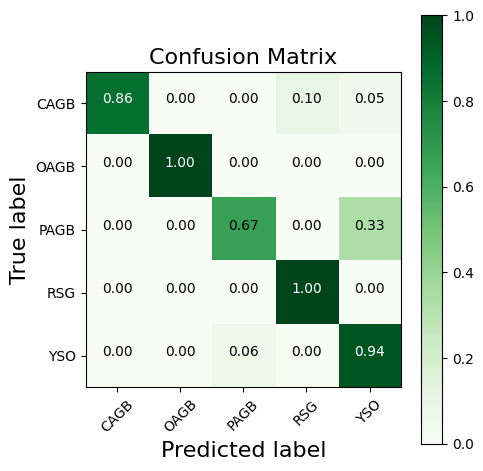

In [ ]:
print(classification_report( Y_test , Y_pred ))
cm = confusion_matrix(Y_test , Y_pred )
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = 'CSV.pdf',
                      size = (5,5))

In [ ]:
import pickle
model_name = 'PRF-S-01-10-92-0'
filename = model_name + '.sav'
pickle.dump(prf_cls, open(filename, 'wb'))

In [ ]:
prf_cls = PRF.prf(n_estimators=100, bootstrap=True, keep_proba=0.1)
prf_cls.fit( X=X_train, y=np.array(Y_train))
Y_pred = prf_cls.predict(X_test)
print('PRF: {}'.format(prf_cls.score(X=X_test, y=np.array(Y_test))))

PRF: 0.9344262295081968


              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       1.00      1.00      1.00        13
           2       0.67      0.67      0.67         3
           3       0.86      1.00      0.92         6
           4       0.89      0.94      0.92        18

    accuracy                           0.93        61
   macro avg       0.88      0.90      0.89        61
weighted avg       0.94      0.93      0.93        61



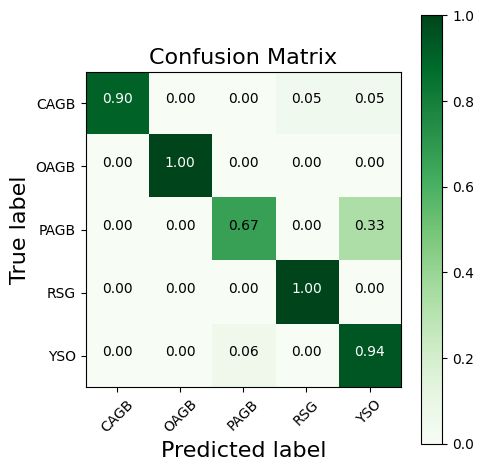

In [ ]:
print(classification_report( Y_test , Y_pred ))
cm = confusion_matrix(Y_test , Y_pred )
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = 'CSV.pdf',
                      size = (5,5))

In [ ]:
import pickle
model_name = 'PRF-S-01-100-93-0'
filename = model_name + '.sav'
pickle.dump(prf_cls, open(filename, 'wb'))

In [ ]:
prf_cls = PRF.prf(n_estimators=10, bootstrap=True, keep_proba=0.5)
prf_cls.fit( X=X_train, y=np.array(Y_train))
Y_pred = prf_cls.predict(X_test)
print('PRF: {}'.format(prf_cls.score(X=X_test, y=np.array(Y_test))))

PRF: 0.9180327868852459


              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.93      1.00      0.96        13
           2       0.67      0.67      0.67         3
           3       0.86      1.00      0.92         6
           4       0.89      0.94      0.92        18

    accuracy                           0.92        61
   macro avg       0.87      0.89      0.88        61
weighted avg       0.92      0.92      0.92        61



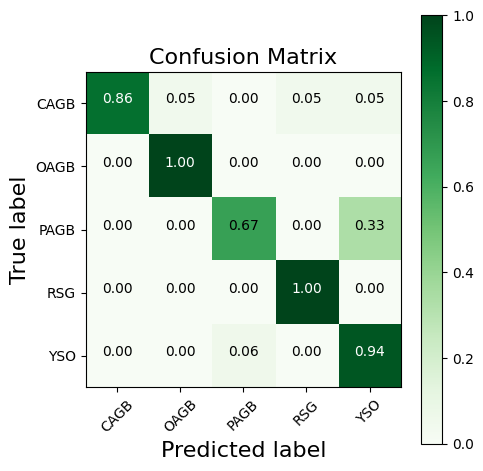

In [ ]:
print(classification_report( Y_test , Y_pred ))
cm = confusion_matrix(Y_test , Y_pred )
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = 'CSV.pdf',
                      size = (5,5))

In [ ]:
import pickle
model_name = 'PRF-S-05-10-92-0'
filename = model_name + '.sav'
pickle.dump(prf_cls, open(filename, 'wb'))

In [ ]:
prf_cls = PRF.prf(n_estimators=10, bootstrap=True, keep_proba=0.3)
prf_cls.fit( X=X_train, y=np.array(Y_train))
Y_pred = prf_cls.predict(X_test)
print('PRF: {}'.format(prf_cls.score(X=X_test, y=np.array(Y_test))))

PRF: 0.9180327868852459


              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       1.00      0.92      0.96        13
           2       1.00      0.67      0.80         3
           3       0.86      1.00      0.92         6
           4       0.90      1.00      0.95        18

    accuracy                           0.93        61
   macro avg       0.94      0.90      0.91        61
weighted avg       0.94      0.93      0.93        61



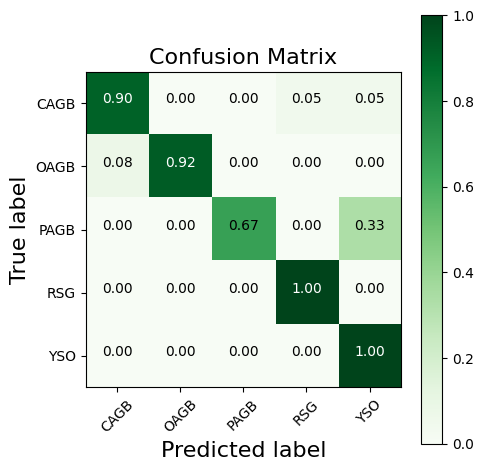

In [ ]:
print(classification_report( Y_test , Y_pred ))
cm = confusion_matrix(Y_test , Y_pred )
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = 'CSV.pdf',
                      size = (5,5))

In [ ]:
import pickle
model_name = 'PRF-S-03-10-93-0'
filename = model_name + '.sav'
pickle.dump(prf_cls, open(filename, 'wb'))

In [ ]:
prf_cls = PRF.prf(n_estimators=50, bootstrap=True, keep_proba=0.8)
prf_cls.fit( X=X_train, y=np.array(Y_train))
Y_pred = prf_cls.predict(X_test)
print('PRF: {}'.format(prf_cls.score(X=X_test, y=np.array(Y_test))))

PRF: 0.9344262295081968


              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       1.00      1.00      1.00        13
           2       0.67      0.67      0.67         3
           3       0.86      1.00      0.92         6
           4       0.89      0.94      0.92        18

    accuracy                           0.93        61
   macro avg       0.88      0.90      0.89        61
weighted avg       0.94      0.93      0.93        61



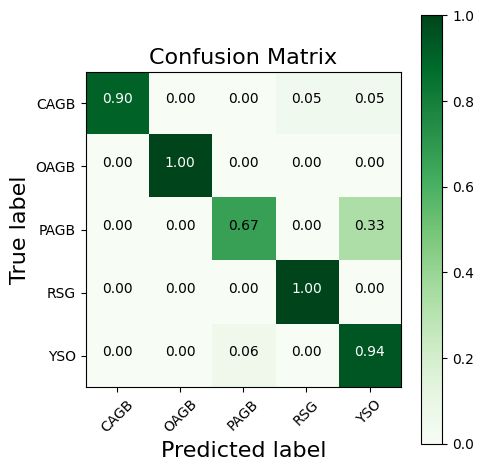

In [ ]:
print(classification_report( Y_test , Y_pred ))
cm = confusion_matrix(Y_test , Y_pred )
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = 'CSV.pdf',
                      size = (5,5))

In [ ]:
import pickle
model_name = 'PRF-S-08-10-93-0'
filename = model_name + '.sav'
pickle.dump(prf_cls, open(filename, 'wb'))

In [ ]:
prf_cls = PRF.prf(n_estimators=10, bootstrap=True, keep_proba=0.9)
prf_cls.fit( X=X_train, y=np.array(Y_train))
Y_pred = prf_cls.predict(X_test)
print('PRF: {}'.format(prf_cls.score(X=X_test, y=np.array(Y_test))))

PRF: 0.9344262295081968


              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.93      1.00      0.96        13
           2       1.00      0.67      0.80         3
           3       0.86      1.00      0.92         6
           4       0.90      1.00      0.95        18

    accuracy                           0.93        61
   macro avg       0.94      0.90      0.91        61
weighted avg       0.94      0.93      0.93        61



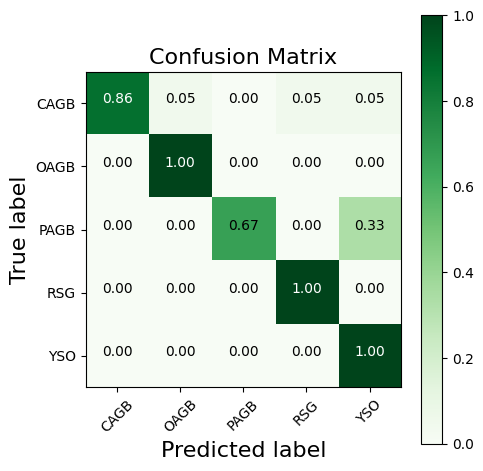

In [ ]:
print(classification_report( Y_test , Y_pred ))
cm = confusion_matrix(Y_test , Y_pred )
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = 'CSV.pdf',
                      size = (5,5))

In [ ]:
import pickle
model_name = 'PRF-S-09-10-93-0'
filename = model_name + '.sav'
pickle.dump(prf_cls, open(filename, 'wb'))

In [ ]:
Address_directory = ''
Models = ['PRF-S-001-10-90-0', 'PRF-S-01-10-92-0', 'PRF-S-01-100-93-0',
          'PRF-S-03-10-93-0', 'PRF-S-05-10-92-0', 'PRF-S-08-10-93-0','PRF-S-09-10-93-0']

Model_name: PRFS
Parameters: 
   keep_proba = 0.
   n_stimator = 10
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        21
           1       0.87      1.00      0.93        13
           2       0.67      0.67      0.67         3
           3       0.86      1.00      0.92         6
           4       0.89      0.94      0.92        18

    accuracy                           0.90        61
   macro avg       0.86      0.88      0.87        61
weighted avg       0.91      0.90      0.90        61



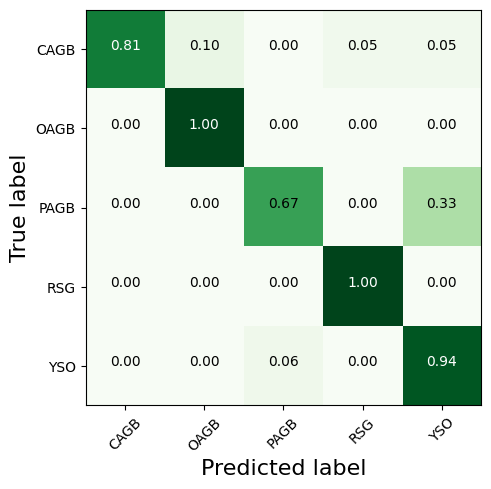

Model_name: PRFS
Parameters: 
   keep_proba = 0.1
   n_stimator = 10
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       1.00      1.00      1.00        13
           2       0.67      0.67      0.67         3
           3       0.75      1.00      0.86         6
           4       0.89      0.94      0.92        18

    accuracy                           0.92        61
   macro avg       0.86      0.89      0.87        61
weighted avg       0.93      0.92      0.92        61



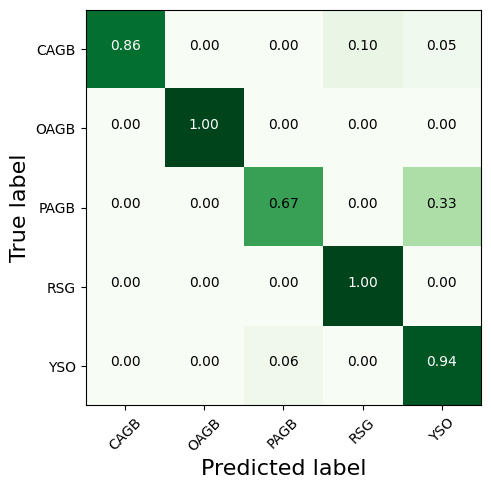

Model_name: PRFS
Parameters: 
   keep_proba = 0.1
   n_stimator = 100
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       1.00      1.00      1.00        13
           2       0.67      0.67      0.67         3
           3       0.86      1.00      0.92         6
           4       0.89      0.94      0.92        18

    accuracy                           0.93        61
   macro avg       0.88      0.90      0.89        61
weighted avg       0.94      0.93      0.93        61



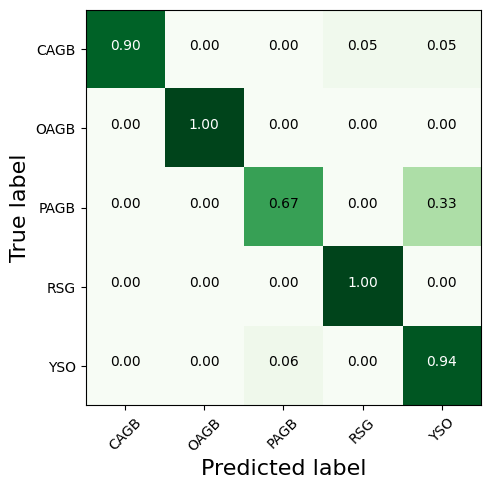

Model_name: PRFS
Parameters: 
   keep_proba = 0.3
   n_stimator = 10
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       1.00      0.92      0.96        13
           2       1.00      0.67      0.80         3
           3       0.86      1.00      0.92         6
           4       0.90      1.00      0.95        18

    accuracy                           0.93        61
   macro avg       0.94      0.90      0.91        61
weighted avg       0.94      0.93      0.93        61



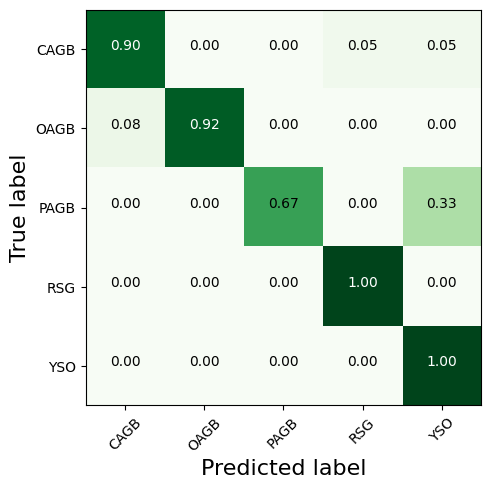

Model_name: PRFS
Parameters: 
   keep_proba = 0.5
   n_stimator = 10
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.93      1.00      0.96        13
           2       0.67      0.67      0.67         3
           3       0.86      1.00      0.92         6
           4       0.89      0.94      0.92        18

    accuracy                           0.92        61
   macro avg       0.87      0.89      0.88        61
weighted avg       0.92      0.92      0.92        61



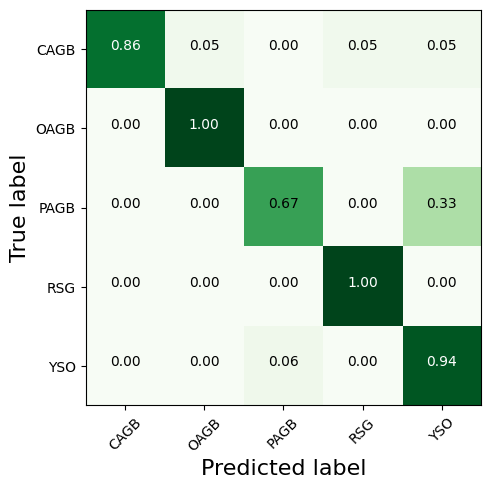

Model_name: PRFS
Parameters: 
   keep_proba = 0.8
   n_stimator = 10
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       1.00      1.00      1.00        13
           2       0.67      0.67      0.67         3
           3       0.86      1.00      0.92         6
           4       0.89      0.94      0.92        18

    accuracy                           0.93        61
   macro avg       0.88      0.90      0.89        61
weighted avg       0.94      0.93      0.93        61



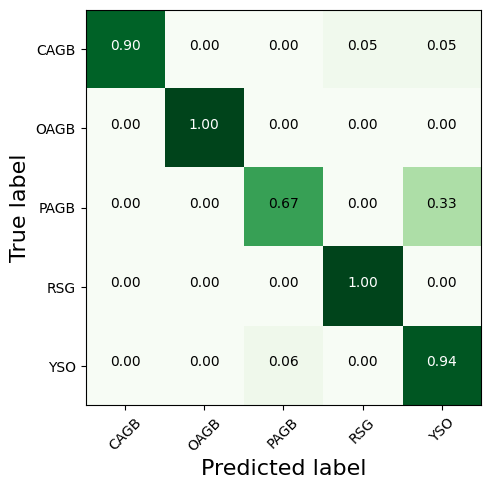

Model_name: PRFS
Parameters: 
   keep_proba = 0.9
   n_stimator = 10
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.93      1.00      0.96        13
           2       1.00      0.67      0.80         3
           3       0.86      1.00      0.92         6
           4       0.90      1.00      0.95        18

    accuracy                           0.93        61
   macro avg       0.94      0.90      0.91        61
weighted avg       0.94      0.93      0.93        61



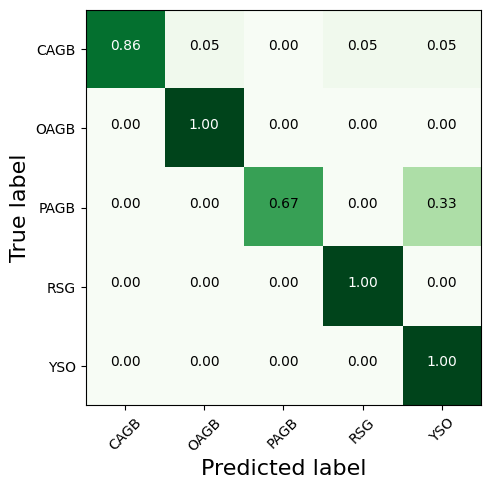

In [ ]:
for i in Models:
  model_name = i
  filename = Address_directory + model_name + '.sav'
  loaded_model = pickle.load(open(filename, 'rb'))
  Y_pred_save_model = loaded_model.predict(X_test)
  Model_name = i.split('-')[0] + i.split('-')[1]
  keep_proba = i.split('-')[2].split('0')[1]
  n_stimator = i.split('-')[3]
  print('======================================================')
  print('Model_name: ' + Model_name)
  print('Parameters: ')
  print('   keep_proba = 0.' + keep_proba)
  print('   n_stimator = ' + n_stimator)
  print('======================================================')
  print(classification_report( Y_test , Y_pred_save_model ))
  cm = confusion_matrix(Y_test , Y_pred_save_model )
  plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = None,
                      file_name = model_name +'_CM.jpg',
                      size = (5,5),
                      color_bar=False)

# SVC

In [ ]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
SVC = SVC()
par = [
       { 'kernel': ['poly'] ,
         'degree' : list(np.arange(1,20,1)),
         'gamma' : list(np.arange(0.2 , 2 , 0.2 )) + ['scale','auto'] ,
         'C': list(np.arange(0.1 , 0.5 , 0.1 ))
        }
       ]
GS = GridSearchCV(SVC, param_grid=par, cv = 4, scoring = None )
GS.fit(X_train, Y_train)

CPU times: user 7min 55s, sys: 607 ms, total: 7min 56s
Wall time: 8min 40s


GridSearchCV(cv=4, estimator=SVC(),
             param_grid=[{'C': [0.1, 0.2, 0.30000000000000004, 0.4],
                          'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                     14, 15, 16, 17, 18, 19],
                          'gamma': [0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2,
                                    1.4000000000000001, 1.6, 1.8, 'scale',
                                    'auto'],
                          'kernel': ['poly']}])

In [ ]:
print(GS.best_score_)
print(GS.best_params_)

0.9598139861367027
{'C': 0.4, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
from sklearn.svm import SVC
SV_model = SVC(kernel='poly' , degree = 5 ,C= 0.4 , gamma = 'scale' )
SV_model.fit(X_train, Y_train)
Y_pred = SV_model.predict(X_test)

print(classification_report( Y_test , Y_pred ))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.85      0.85      0.85        13
           2       0.60      1.00      0.75         3
           3       0.86      1.00      0.92         6
           4       1.00      0.83      0.91        18

    accuracy                           0.90        61
   macro avg       0.85      0.93      0.88        61
weighted avg       0.92      0.90      0.90        61



In [ ]:
import pickle
model_name = 'SVC-S-poly-90-0'
filename = model_name + '.sav'
pickle.dump(SV_model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
Y_pred_save_model = loaded_model.predict(X_test)

In [ ]:
print(classification_report( Y_test , Y_pred_save_model ))
cm = confusion_matrix(Y_test , Y_pred_save_model )

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.85      0.85      0.85        13
           2       0.60      1.00      0.75         3
           3       0.86      1.00      0.92         6
           4       1.00      0.83      0.91        18

    accuracy                           0.90        61
   macro avg       0.85      0.93      0.88        61
weighted avg       0.92      0.90      0.90        61



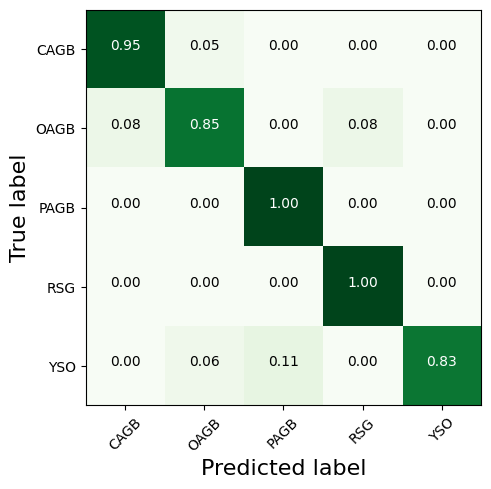

In [ ]:
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = None,
                      file_name = model_name +'_CM.jpg',
                      size = (5,5),
                      color_bar=False)

In [ ]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
SVC = SVC()
par = [
       { 'kernel': ['linear', 'rbf'] ,
         'gamma' : list(np.arange(0.2 , 2 , 0.2 )) + ['scale','auto'] ,
         'C': list(np.arange(0.1 , 0.5 , 0.1 ))
        }
       ]
GS = GridSearchCV(SVC, param_grid=par, cv = 4 , scoring=None)
GS.fit(X_train, Y_train)

CPU times: user 9.31 s, sys: 14.9 ms, total: 9.32 s
Wall time: 9.4 s


GridSearchCV(cv=4, estimator=SVC(),
             param_grid=[{'C': [0.1, 0.2, 0.30000000000000004, 0.4],
                          'gamma': [0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2,
                                    1.4000000000000001, 1.6, 1.8, 'scale',
                                    'auto'],
                          'kernel': ['linear', 'rbf']}])

In [ ]:
print(GS.best_score_)
print(GS.best_params_)

0.8708395484191747
{'C': 0.4, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
from sklearn.svm import SVC
SV_model = SVC(kernel='rbf', C= 0.4, gamma = 'scale' )
SV_model.fit(X_train, Y_train)
Y_pred = SV_model.predict(X_test)

print(classification_report( Y_test , Y_pred ))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        21
           1       0.73      0.85      0.79        13
           2       0.33      0.67      0.44         3
           3       0.86      1.00      0.92         6
           4       0.88      0.83      0.86        18

    accuracy                           0.82        61
   macro avg       0.76      0.82      0.78        61
weighted avg       0.86      0.82      0.83        61



In [ ]:
import pickle
model_name = 'SVC-S-rbf-82-0'
filename = model_name + '.sav'
pickle.dump(SV_model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
Y_pred_save_model = loaded_model.predict(X_test)

In [ ]:
print(classification_report( Y_test , Y_pred_save_model ))
cm = confusion_matrix(Y_test , Y_pred_save_model )

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        21
           1       0.73      0.85      0.79        13
           2       0.33      0.67      0.44         3
           3       0.86      1.00      0.92         6
           4       0.88      0.83      0.86        18

    accuracy                           0.82        61
   macro avg       0.76      0.82      0.78        61
weighted avg       0.86      0.82      0.83        61



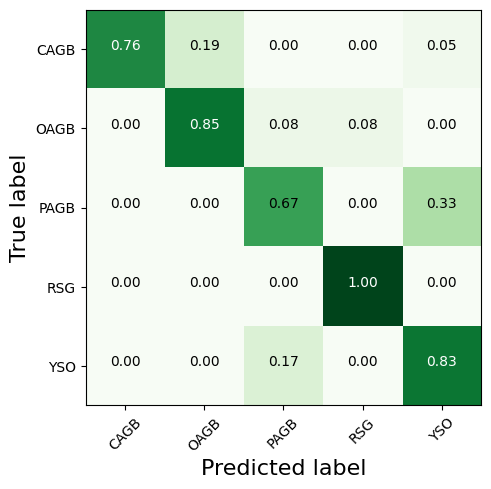

In [ ]:
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = None,
                      file_name = model_name +'_CM.jpg',
                      size = (5,5),
                      color_bar=False)

# GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit( X_train , Y_train )
Y_pred = GNB.predict(X_test)

print(classification_report( Y_test , Y_pred ))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        21
           1       0.67      0.77      0.71        13
           2       0.17      0.33      0.22         3
           3       0.60      1.00      0.75         6
           4       0.81      0.72      0.76        18

    accuracy                           0.72        61
   macro avg       0.65      0.70      0.65        61
weighted avg       0.79      0.72      0.74        61



In [ ]:
import pickle
model_name = 'GNB-S-72-0'
filename = model_name + '.sav'
pickle.dump(GNB, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
Y_pred_save_model = loaded_model.predict(X_test)

In [ ]:
print(classification_report( Y_test , Y_pred_save_model ))
cm = confusion_matrix(Y_test , Y_pred_save_model )

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        21
           1       0.67      0.77      0.71        13
           2       0.17      0.33      0.22         3
           3       0.60      1.00      0.75         6
           4       0.81      0.72      0.76        18

    accuracy                           0.72        61
   macro avg       0.65      0.70      0.65        61
weighted avg       0.79      0.72      0.74        61



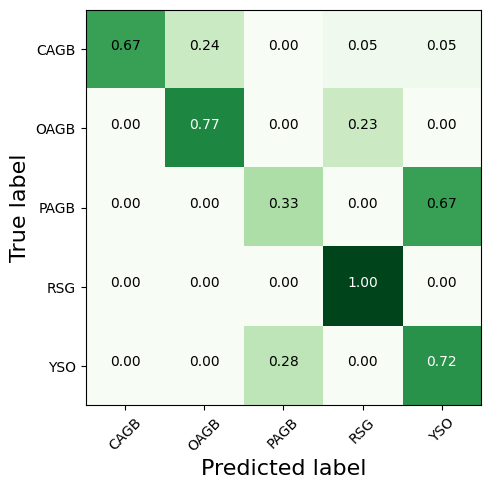

In [ ]:
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = None,
                      file_name = model_name +'_CM.jpg',
                      size = (5,5),
                      color_bar=False)

# MultinomialNB

In [ ]:
from sklearn.naive_bayes import  MultinomialNB

MNB = MultinomialNB()
MNB.fit( X_train, Y_train )
Y_pred = MNB.predict(X_test)

print(classification_report( Y_test , Y_pred ))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79        21
           1       0.73      0.85      0.79        13
           2       0.14      0.33      0.20         3
           3       0.57      0.67      0.62         6
           4       0.80      0.67      0.73        18

    accuracy                           0.70        61
   macro avg       0.63      0.65      0.62        61
weighted avg       0.76      0.70      0.72        61



# KNeighborsClassifier

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
KNN = KNeighborsClassifier(n_jobs=-1)
par = [
       { 
         'n_neighbors' : list(np.arange(2 , 10 , 1 )) ,
         'weights': ['distance' , 'uniform'] ,
          'algorithm' : ['auto','ball_tree', 'kd_tree', 'brute' ]
        }
       ]
GS = GridSearchCV(KNN, param_grid=par, cv = 4, scoring = None)
GS.fit(X_train, Y_train)

CPU times: user 2.61 s, sys: 63.1 ms, total: 2.68 s
Wall time: 4.77 s


GridSearchCV(cv=4, estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9],
                          'weights': ['distance', 'uniform']}])

In [ ]:
print(GS.best_score_)
print(GS.best_params_)

0.9368547278523587
{'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier( n_neighbors = 2 , weights= 'distance', n_jobs= 3 )
KNN.fit( X_train , Y_train )
Y_pred = KNN.predict(X_test)

print(classification_report( Y_test , Y_pred ))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       1.00      0.69      0.82        13
           2       1.00      0.67      0.80         3
           3       0.75      1.00      0.86         6
           4       0.90      1.00      0.95        18

    accuracy                           0.89        61
   macro avg       0.90      0.85      0.86        61
weighted avg       0.90      0.89      0.88        61



In [ ]:
import pickle
model_name = 'KNN-S-89-0'
filename = model_name + '.sav'
pickle.dump(KNN, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
Y_pred_save_model = loaded_model.predict(X_test)

In [ ]:
print(classification_report( Y_test , Y_pred_save_model ))
cm = confusion_matrix(Y_test , Y_pred_save_model )

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       1.00      0.69      0.82        13
           2       1.00      0.67      0.80         3
           3       0.75      1.00      0.86         6
           4       0.90      1.00      0.95        18

    accuracy                           0.89        61
   macro avg       0.90      0.85      0.86        61
weighted avg       0.90      0.89      0.88        61



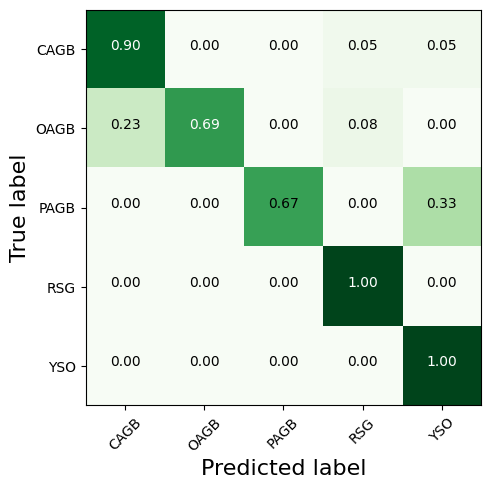

In [ ]:
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = None,
                      file_name = model_name +'_CM.jpg',
                      size = (5,5),
                      color_bar=False)

# Random Forest

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
RF = RandomForestClassifier(n_jobs=-1, random_state=0)
par = [
       { 
         'max_depth' : list(np.arange(1 , 10 , 1 )) ,
         'n_estimators': [10,50,100,1000],
         'criterion' : ['gini', 'entropy', 'log_loss']
        }
       ]
GS = GridSearchCV(RF, param_grid=par, cv = 4, scoring = None)
GS.fit(X, Y)

CPU times: user 1min 37s, sys: 9.71 s, total: 1min 46s
Wall time: 4min 27s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'n_estimators': [10, 50, 100, 1000]}])

In [ ]:
print(GS.best_score_)
print(GS.best_params_)

0.8470394736842105
{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 1000}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=9, random_state=0 , n_estimators=1000 , criterion = 'gini')
RF.fit( X_train , Y_train )
Y_pred = RF.predict(X_test)

print(classification_report( Y_test , Y_pred ))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.93      1.00      0.96        13
           2       0.50      0.67      0.57         3
           3       0.86      1.00      0.92         6
           4       0.89      0.89      0.89        18

    accuracy                           0.90        61
   macro avg       0.83      0.88      0.85        61
weighted avg       0.91      0.90      0.90        61



In [ ]:
import pickle
model_name = 'RF-S-9-1000-90-0'
filename = model_name + '.sav'
pickle.dump(RF, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
Y_pred_save_model = loaded_model.predict(X_test)

In [ ]:
print(classification_report( Y_test , Y_pred_save_model ))
cm = confusion_matrix(Y_test , Y_pred_save_model )

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.93      1.00      0.96        13
           2       0.50      0.67      0.57         3
           3       0.86      1.00      0.92         6
           4       0.89      0.89      0.89        18

    accuracy                           0.90        61
   macro avg       0.83      0.88      0.85        61
weighted avg       0.91      0.90      0.90        61



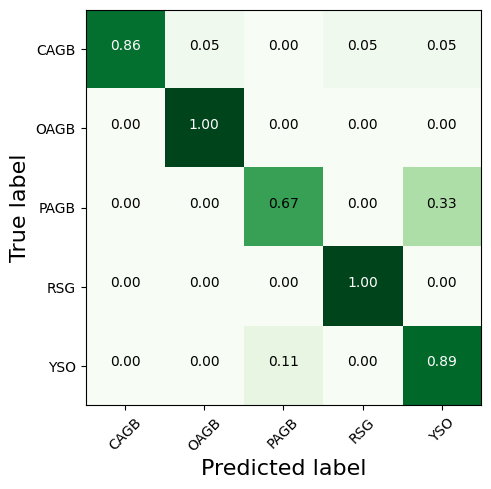

In [ ]:
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = None,
                      file_name = model_name +'_CM.jpg',
                      size = (5,5),
                      color_bar=False)

In [22]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=8, random_state=0 , n_estimators=50 , criterion = 'gini')
RF.fit( X_train , Y_train )
Y_pred = RF.predict(X_test)

print(classification_report( Y_test , Y_pred ))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       1.00      1.00      1.00        13
           2       0.50      0.67      0.57         3
           3       0.86      1.00      0.92         6
           4       0.89      0.89      0.89        18

    accuracy                           0.92        61
   macro avg       0.85      0.89      0.87        61
weighted avg       0.93      0.92      0.92        61



In [23]:
import pickle
model_name = 'RF-S-8-50-92-0'
filename = model_name + '.sav'
pickle.dump(RF, open(filename, 'wb'))

In [24]:
loaded_model = pickle.load(open(filename, 'rb'))
Y_pred_save_model = loaded_model.predict(X_test)

In [25]:
print(classification_report( Y_test , Y_pred_save_model ))
cm = confusion_matrix(Y_test , Y_pred_save_model )

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       1.00      1.00      1.00        13
           2       0.50      0.67      0.57         3
           3       0.86      1.00      0.92         6
           4       0.89      0.89      0.89        18

    accuracy                           0.92        61
   macro avg       0.85      0.89      0.87        61
weighted avg       0.93      0.92      0.92        61



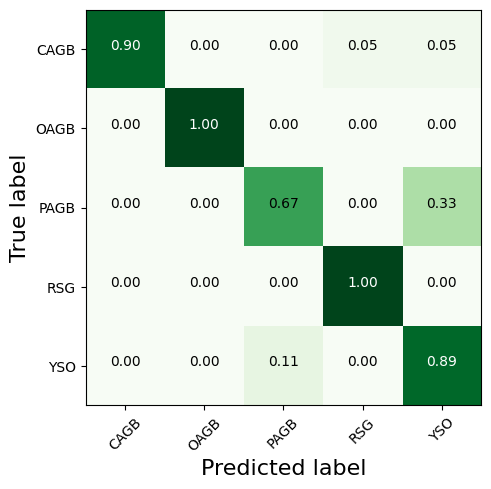

In [26]:
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = None,
                      file_name = model_name +'_CM.jpg',
                      size = (5,5),
                      color_bar=False)

**Feature importances**

In [27]:
import time
import numpy as np

start_time = time.time()
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.016 seconds


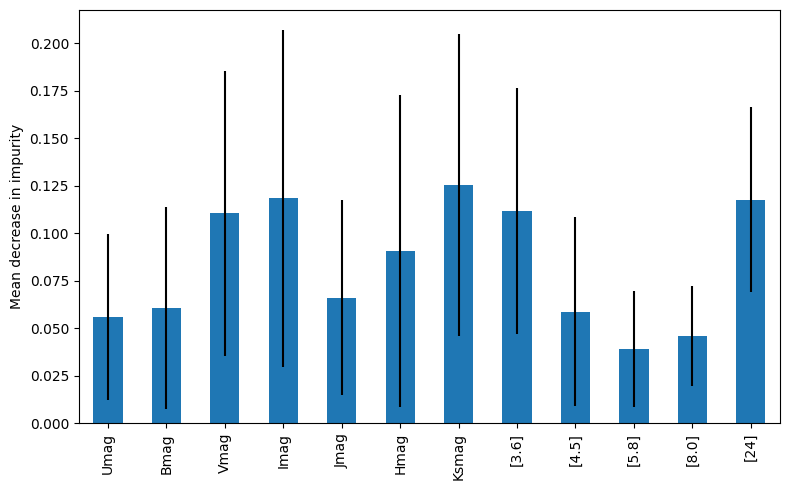

In [28]:
feature_names = df.columns[2:-2]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(8,5))
forest_importances.plot.bar(yerr=std, ax=ax)
#ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.savefig('feature_importance_Smote.pdf',dpi=400)

# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='entropy', max_depth=4,\
                             min_samples_split=10, min_samples_leaf=3, random_state=2)
DTC.fit( X_train , Y_train )
Y_pred = DTC.predict(X_test)

print(classification_report( Y_test , Y_pred ))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.86      0.92      0.89        13
           2       0.15      0.67      0.25         3
           3       1.00      1.00      1.00         6
           4       0.82      0.50      0.62        18

    accuracy                           0.74        61
   macro avg       0.75      0.77      0.72        61
weighted avg       0.85      0.74      0.77        61

